In [19]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install streamlit

In [24]:
import streamlit as st
import numpy as np
import pandas  as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression 
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [25]:
SE = StandardScaler()
LR = LogisticRegression()

In [26]:
df=pd.read_csv('train.csv')

In [27]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,58582,58583,58584,58585,58586,58587,58588,58589,58590,58591
policy_id,ID00001,ID00002,ID00003,ID00004,ID00005,ID00006,ID00007,ID00008,ID00009,ID00010,...,ID58583,ID58584,ID58585,ID58586,ID58587,ID58588,ID58589,ID58590,ID58591,ID58592
policy_tenure,0.515874,0.672619,0.84111,0.900277,0.596403,1.018709,0.097992,0.509085,0.282394,0.566255,...,0.330476,0.00287,0.009512,0.366244,1.240162,0.355089,1.199642,1.162273,1.236307,0.124429
age_of_car,0.05,0.02,0.02,0.11,0.11,0.07,0.16,0.14,0.07,0.04,...,0.11,0.03,0.0,0.09,0.07,0.13,0.02,0.05,0.14,0.02
age_of_policyholder,0.644231,0.375,0.384615,0.432692,0.634615,0.519231,0.403846,0.423077,0.298077,0.442308,...,0.432692,0.288462,0.307692,0.557692,0.461538,0.644231,0.519231,0.451923,0.557692,0.442308
area_cluster,C1,C2,C3,C4,C5,C6,C7,C8,C7,C9,...,C2,C14,C13,C8,C3,C8,C14,C5,C8,C8
population_density,4990,27003,4076,21622,34738,13051,6112,8794,6112,17804,...,27003,7788,5410,8794,4076,8794,7788,34738,8794,8794
make,1,1,1,1,2,3,4,1,3,1,...,1,3,3,3,3,2,1,1,1,3
segment,A,A,A,C1,A,C2,B2,B2,C2,B2,...,B2,C2,C2,C2,C2,A,A,A,B2,C2
model,M1,M1,M1,M2,M3,M4,M5,M6,M4,M7,...,M7,M4,M4,M4,M4,M3,M1,M1,M6,M4
fuel_type,CNG,CNG,CNG,Petrol,Petrol,Diesel,Diesel,Petrol,Diesel,Petrol,...,Petrol,Diesel,Diesel,Diesel,Diesel,Petrol,CNG,CNG,Petrol,Diesel


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

Variable Categorization-

In [31]:
print(df.select_dtypes(include=object).columns)
print(df.select_dtypes(exclude=object).columns)

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')
Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')


<h2>Checking for Missing values-</h2>

In [32]:
df.isnull().sum()

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

No missing values are there in any of the features in the dataset

<h2>Exploratory Data Analysis-</h2>

<h3>Checking for Multicolleniarity-</h3>

<AxesSubplot:>

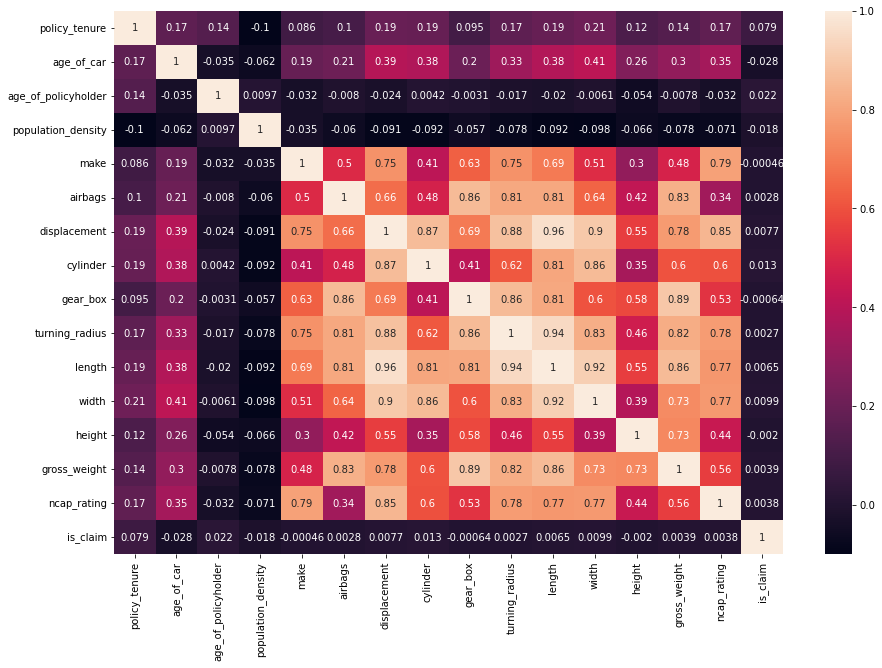

In [33]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

We can see that multicolleniarity exist between many columns.

In [34]:
df1=df.copy()

In [35]:
df1['claim']=df.is_claim.apply(lambda x: 'Claimed' if x ==1 else 'Not Claimed')
df1.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,Yes,No,No,No,Yes,0,0,Not Claimed
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,Yes,No,No,No,Yes,0,0,Not Claimed
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,Yes,No,No,No,Yes,0,0,Not Claimed
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,Not Claimed
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0,Not Claimed


<h2>Univariate Analysis</h2>

<AxesSubplot:ylabel='claim'>

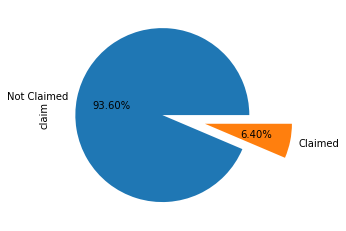

In [36]:
df1.claim.value_counts().plot(kind='pie',autopct='%1.2f%%',explode=[0,0.5])

Data is unbalanced with respect to our target variable is_claim.As shown the graph plotted above 93.6% of policies are not 
claimed and only 6.45 of policies are claimed

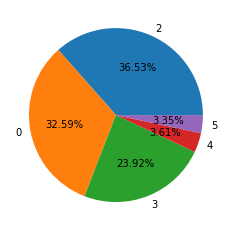

In [37]:
plt.pie(df1.ncap_rating.value_counts().values,labels=df1.ncap_rating.value_counts().index,autopct='%1.2f%%')
plt.show()

We can see that most of the cars have ncap rating 2,0 and 3 whereas very less hve ncap rating 4 and 5 also no cars have ncap rating 1.

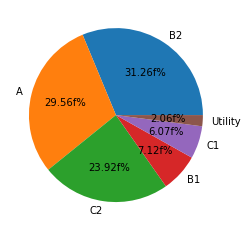

In [38]:
plt.pie(df1.segment.value_counts().values,labels=df1.segment.value_counts().index,autopct='%1.2ff%%')
plt.show()

We can see that most of the cars are from A,B2 and C2 segment whereas very less from B1,C1 and utility.

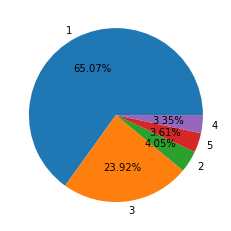

In [39]:
plt.pie(df1.make.value_counts().values,labels=df1.make.value_counts().index,autopct='%1.2f%%')
plt.show()

Manufacturer 1 has maximum cars whereas very less cars are from company 2,5 and 4.

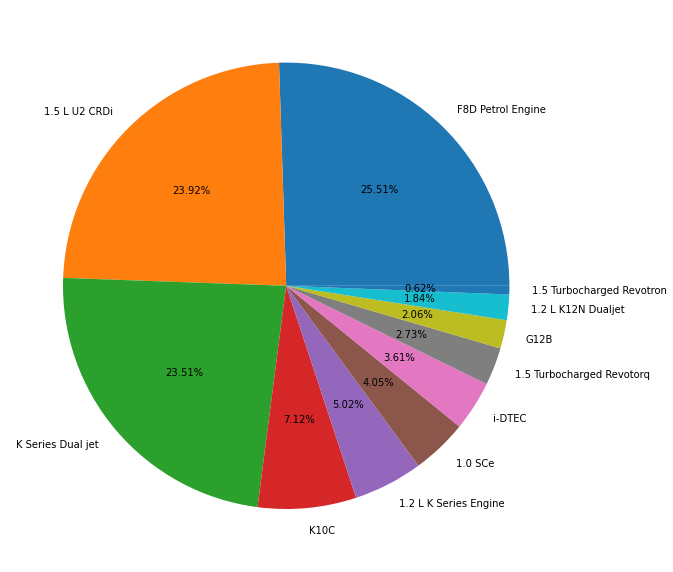

In [40]:
plt.figure(figsize=(10,12))
plt.pie(labels=df1.engine_type.value_counts().index,x=df1.engine_type.value_counts(),autopct='%1.2f%%')
plt.show()

F8D Petrol engine, 1.5 L U2 CRDi and K Series Dual jet are the commonly used engine types in most of the cars.

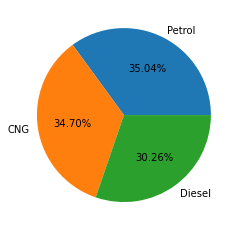

In [41]:
plt.pie(labels=df1.fuel_type.value_counts().index,x=df1.fuel_type.value_counts(),autopct='%1.2f%%')
plt.show()

Cars use nearly all type  fuel types but petrol is maximum among them.

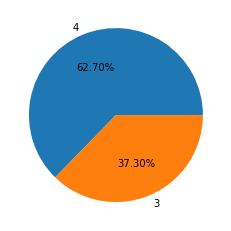

In [42]:
plt.pie(labels=df.cylinder.value_counts().index,x=df.cylinder.value_counts(),autopct='%1.2f%%')
plt.show()

Most of the cars have 4 cylinders presnt in the engine of the car.

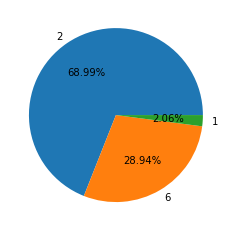

In [43]:
plt.pie(labels=df.airbags.value_counts().index,x=df.airbags.value_counts(),autopct='%1.2f%%')
plt.show()

Most of the cars have 2 airbags installed in the car.

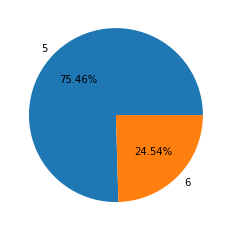

In [44]:
plt.pie(labels=df.gear_box.value_counts().index,x=df.gear_box.value_counts(),autopct='%1.2f%%')
plt.show()

Most of the cars have 5 gears installed in the car.

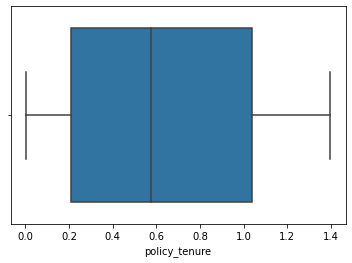

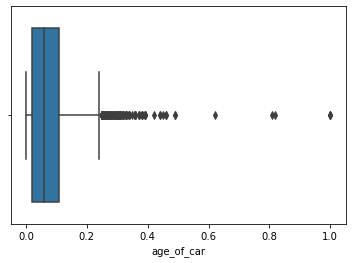

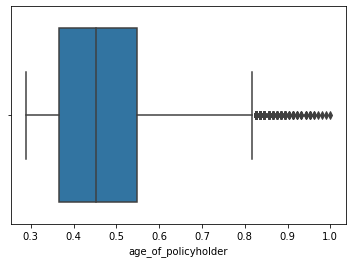

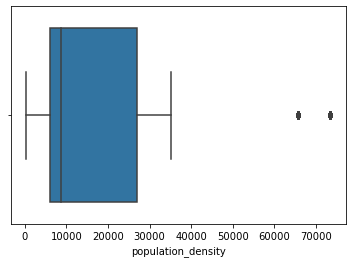

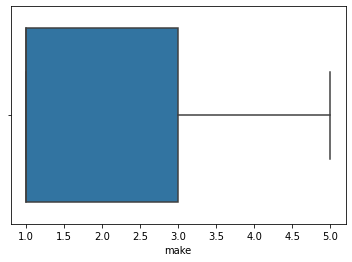

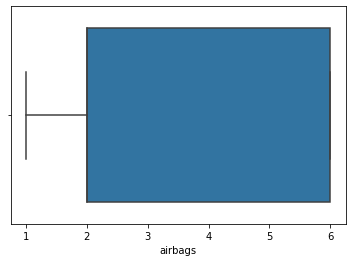

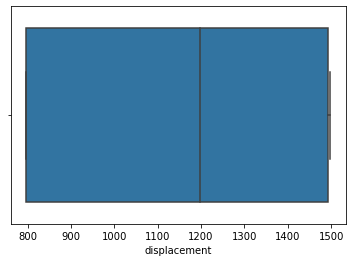

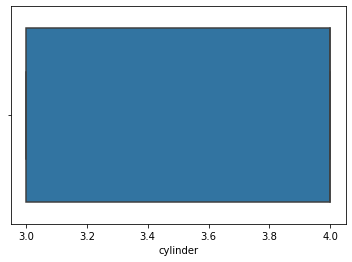

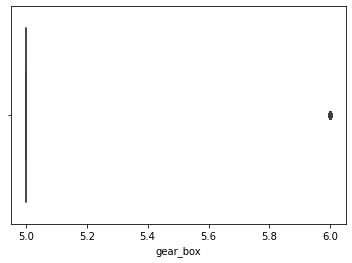

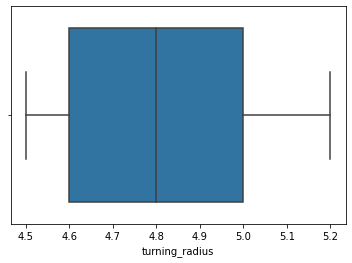

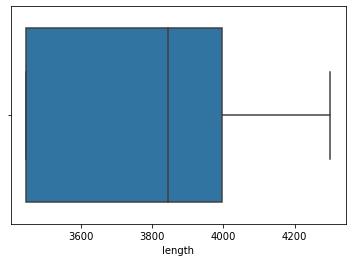

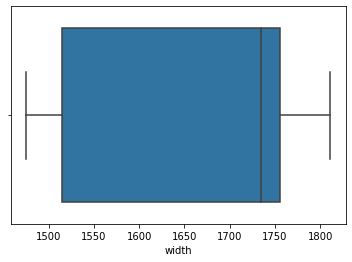

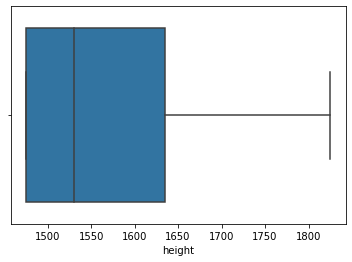

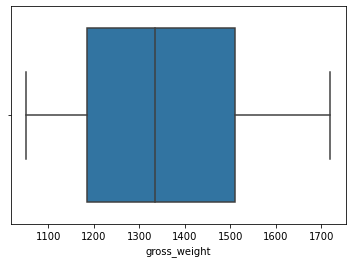

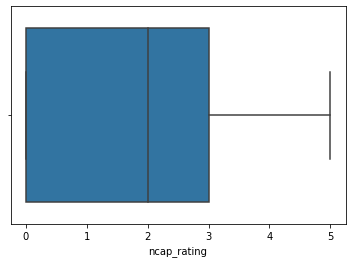

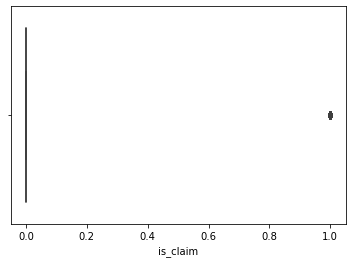

In [45]:
df_num=df.select_dtypes(include=np.number)
for i in df_num.columns:
    sns.boxplot(df[i])
    plt.show()

We can see from plots that age_of_car,age_of_policyholder and population_density have outliers present in them.

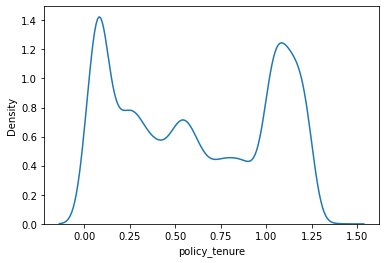

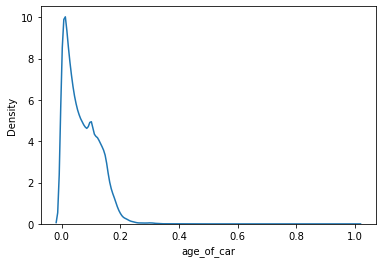

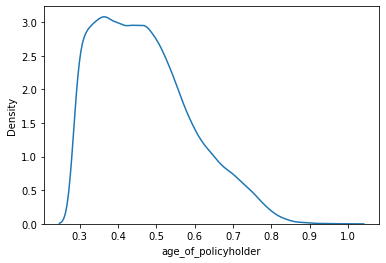

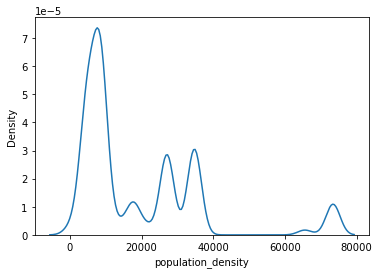

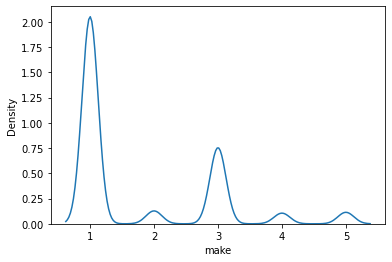

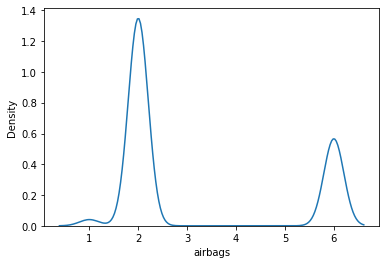

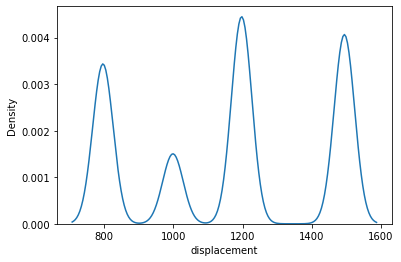

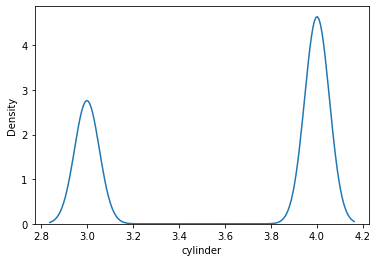

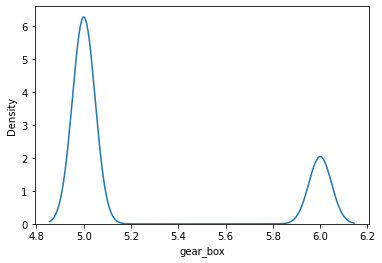

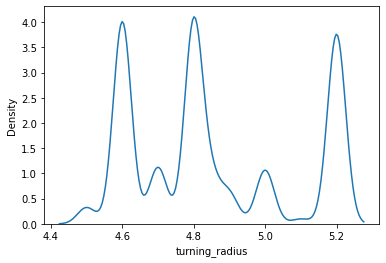

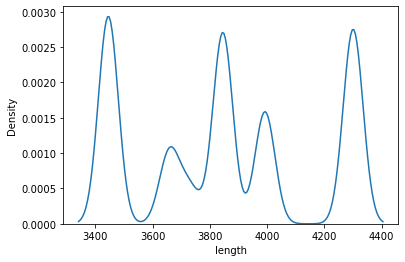

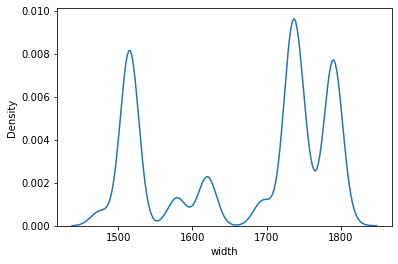

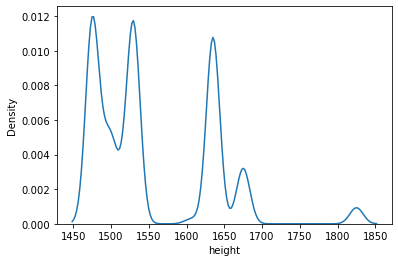

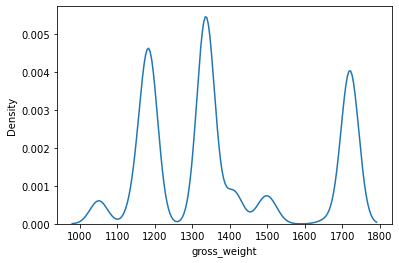

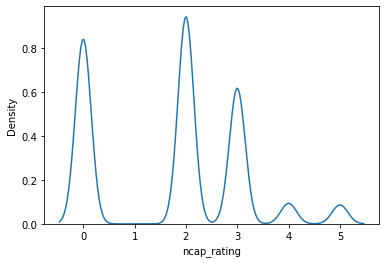

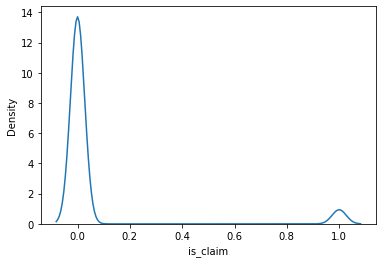

In [21]:
df_num=df.select_dtypes(include=np.number)
for i in df_num.columns:
    sns.kdeplot(df[i])
    plt.show()

Data is highly skewed and not normaly distributed.Transformation is required.

<h2>Bivariate Analysis</h2>

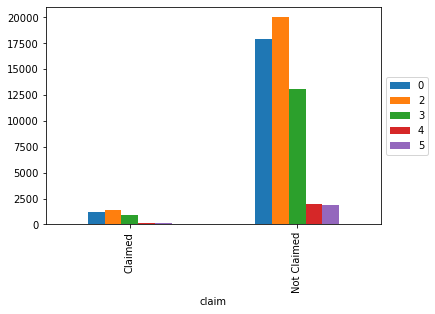

In [50]:
pd.crosstab(df1.claim,df1.ncap_rating).plot(kind='b
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Claimed and not claimed car both have similar distribution wrt ncap rating were maximum cars have ncap rating of 2

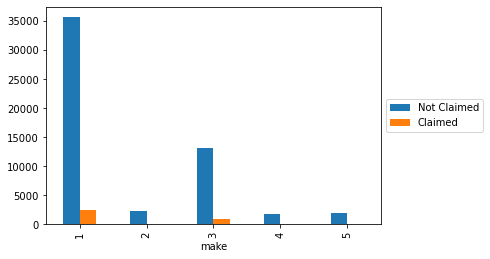

In [51]:
pd.crosstab(df1.make,df1.claim).iloc[:,[1,0]].plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Only cars from manufacturer 1 and 3 have claimed insurance.

<AxesSubplot:xlabel='make'>

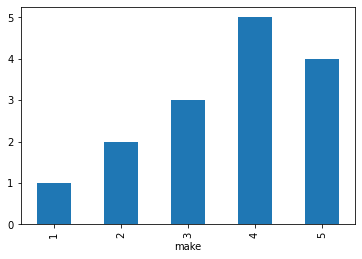

In [52]:
df1.groupby('make')['ncap_rating'].mean().plot(kind='bar')

<AxesSubplot:xlabel='claim', ylabel='age_of_car'>

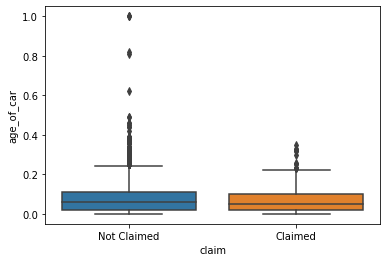

In [53]:
sns.boxplot(df1.claim,df1.age_of_car)

Claims are not much affected by age of car.

<AxesSubplot:xlabel='claim', ylabel='policy_tenure'>

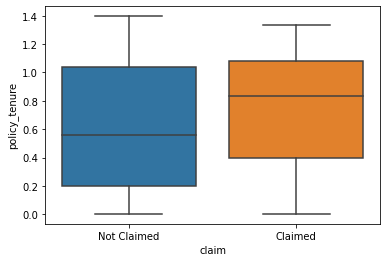

In [54]:
sns.boxplot(df1.claim,df1.policy_tenure)

Plot shows that cars with high policy tenure have more claims.

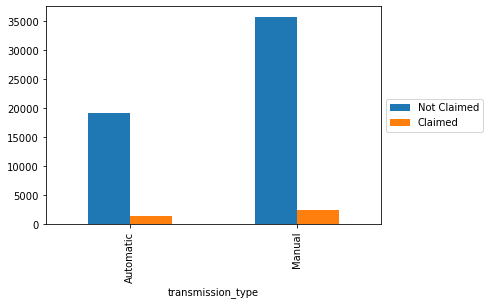

In [55]:
pd.crosstab(df1.transmission_type,df1.claim).iloc[:,[1,0]].plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Manual cars are more than automatic cars but claims are similar for both the types.

<AxesSubplot:xlabel='transmission_type', ylabel='age_of_policyholder'>

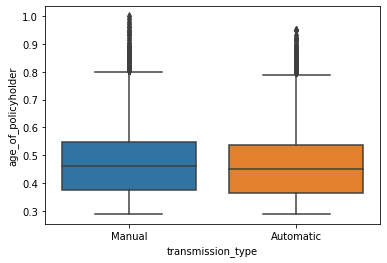

In [56]:
sns.boxplot(df1.transmission_type,df1.age_of_policyholder)

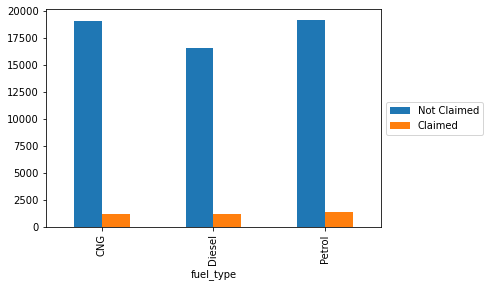

In [57]:
pd.crosstab(df1.fuel_type,df1.claim).iloc[:,[1,0]].plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Cars are using all types of fuels.
Claims are not influenced by type of fuel as per the graph plotted.

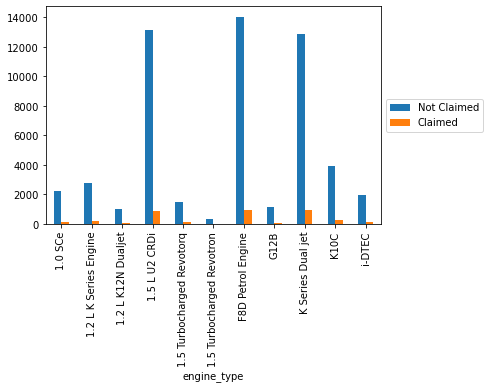

In [58]:
pd.crosstab(df1.engine_type,df1.claim).iloc[:,[1,0]].plot(kind='bar')

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Engine type does not influence claim.

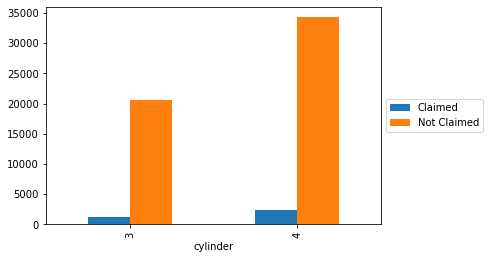

In [59]:
pd.crosstab(df1.cylinder,df1.claim).plot(kind='bar',)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

No. of cylinders does not influence claims.

<AxesSubplot:xlabel='claim', ylabel='population_density'>

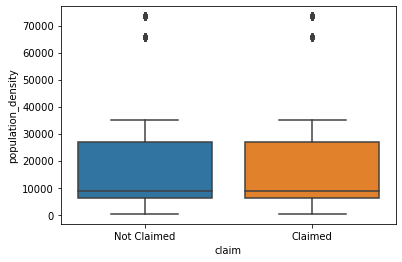

In [60]:
sns.boxplot(df1.claim,df1.population_density)

Population density does not influence claim.

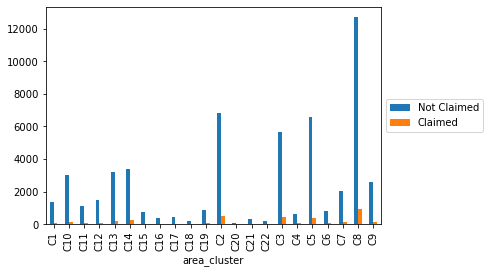

In [61]:
pd.crosstab(df1.area_cluster,df1.claim).iloc[:,[1,0]].plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Most of the cars belong to are cluster c8 but all the ratio of claims for all the areas is nearly same.

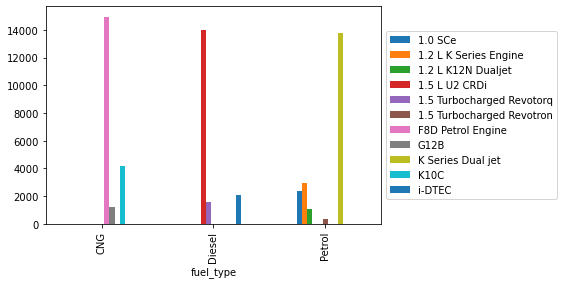

In [62]:
pd.crosstab(df1.fuel_type,df1.engine_type).plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Cars using CNG have mostly F8D petrol engine Cars using Deisel have mostly 1.5 U2 CRDi engine Cars using petrol have mostly K series dual jet engine

In [65]:
d_pd=pd.crosstab(columns=df1['claim'],index=df1['population_density'],values=df1['is_claim'],aggfunc='count')
d_pd
d_pd['claiming percentage']=d_pd['Claimed']*100/(d_pd['Not Claimed']+d_pd['Claimed'])
d_pd['Notclaimingpercentage']=d_pd['Not Claimed']*100/(d_pd['Not Claimed']+d_pd['Claimed'])
d_pd

claim,Claimed,Not Claimed,claiming percentage,Notclaimingpercentage
population_density,,,,
290,38,733,4.928664,95.071336
3264,29,350,7.651715,92.348285
4076,433,5668,7.097197,92.902803
4990,76,1392,5.177112,94.822888
5410,195,3228,5.696757,94.303243
6108,72,1140,5.940594,94.059406
6112,109,2058,5.029995,94.970005
7788,281,3379,7.677596,92.322404
8794,954,12700,6.986964,93.013036


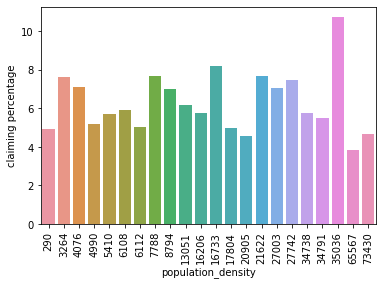

In [68]:
sns.barplot(data=d_pd,x=d_pd.index,y=d_pd['claiming percentage'])
plt.xticks(rotation=90)
plt.show()

head

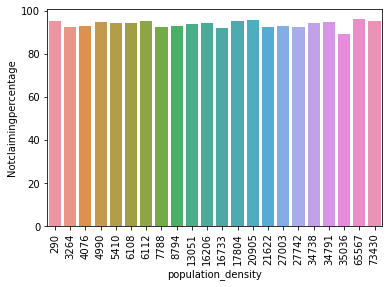

In [69]:
sns.barplot(data=d_pd,x=d_pd.index,y=d_pd['Notclaimingpercentage'])
plt.xticks(rotation=90)
plt.show()

From above graphs we can say that population desity do not have any significant efffect on claiming the insurance. It is mostly uniform throughout.

<AxesSubplot:xlabel='policy_tenure', ylabel='Count'>

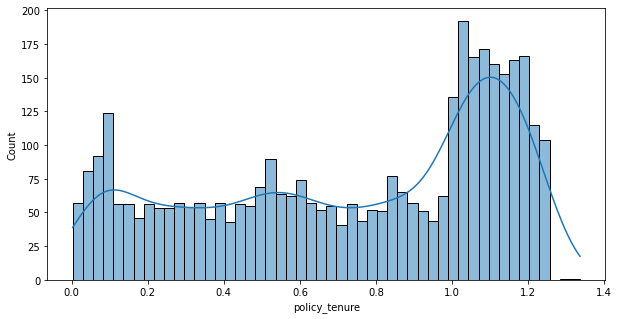

In [70]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['is_claim']==1]['policy_tenure'],kde=True,bins=50)

From the above plot we may say that there is a steep increase in claiming for the policies whose tenure is more than 1.

Now there can be several reasons for that, like, since the tenure is longer the parameter supporting claim have more time to get fullfilled (older the car is, moreis the duration for something getting damage), also another factor can be false claiming due to increase in number of premiums to be paid, etc.

The reason behind this can be found by proper field study.

For now ==> We can conclude that in general claiming is more for policies which have normalized tenure more than 1.


# **Claim with Age of Car**

<AxesSubplot:xlabel='age_of_car', ylabel='Count'>

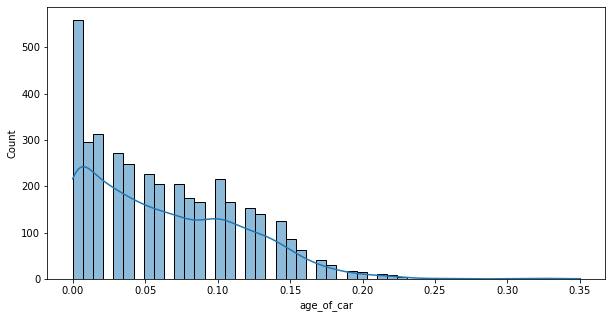

In [71]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['is_claim']==1]['age_of_car'],kde=True,bins=50)

From the above plot we can say that among the people going for the claim, the trend is that as the age of the car increases the number of claims decreases.

Now this may be just because the number of cars with less age are much more than those with more age.

Due to above we can go for a different method, lets look at the claiming percentage at every interval 0.5 for age.


In [72]:
i=0
l_claiming=[]
print("THE CLAIMING PERCENTAGE FOR DIFFERENT AGE INTERVALS")
while i<=1:
    d=df.copy()
    print('For age in interval',i,' ',i+0.05)
    x=d[(d['age_of_car']>=i) & (d['age_of_car']<i+0.05)]['is_claim'].value_counts(normalize=True)
    
    print(x)
    i=i+0.05
    try:
        l_claiming.append(x[1])
        
    except:
        continue
    

THE CLAIMING PERCENTAGE FOR DIFFERENT AGE INTERVALS
For age in interval 0   0.05
0    0.932482
1    0.067518
Name: is_claim, dtype: float64
For age in interval 0.05   0.1
0    0.933201
1    0.066799
Name: is_claim, dtype: float64
For age in interval 0.1   0.15000000000000002
0    0.93897
1    0.06103
Name: is_claim, dtype: float64
For age in interval 0.15000000000000002   0.2
0    0.956115
1    0.043885
Name: is_claim, dtype: float64
For age in interval 0.2   0.25
0    0.950131
1    0.049869
Name: is_claim, dtype: float64
For age in interval 0.25   0.3
0    0.97931
1    0.02069
Name: is_claim, dtype: float64
For age in interval 0.3   0.35
0    0.94382
1    0.05618
Name: is_claim, dtype: float64
For age in interval 0.35   0.39999999999999997
0    0.952381
1    0.047619
Name: is_claim, dtype: float64
For age in interval 0.39999999999999997   0.44999999999999996
0    1.0
Name: is_claim, dtype: float64
For age in interval 0.44999999999999996   0.49999999999999994
0    1.0
Name: is_claim, d

**Here we can say that after the age of 0.4 there are no claims**

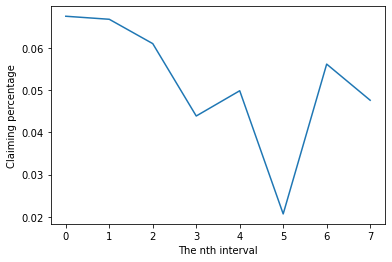

In [73]:
plt.plot(l_claiming)
plt.xlabel('The nth interval')
plt.ylabel('Claiming percentage')

plt.show()

**In general we can say that there a gradual overall decrease in the percentage of claim as age increase**


# Make

In [74]:
d_make=pd.crosstab(columns=df1['claim'],index=df1['make'],values=df1['is_claim'],aggfunc='count')
d_make

claim,Claimed,Not Claimed
make,,
1,2455,35671
2,128,2245
3,901,13117
4,131,1830
5,133,1981


In [75]:
d_make['claiming percentage']=d_make['Claimed']*100/(d_make['Not Claimed']+d_make['Claimed'])
d_make['NOTclaiming percentage']=d_make['Not Claimed']*100/(d_make['Not Claimed']+d_make['Claimed'])
d_make

claim,Claimed,Not Claimed,claiming percentage,NOTclaiming percentage
make,,,,
1,2455,35671,6.439175,93.560825
2,128,2245,5.394016,94.605984
3,901,13117,6.427450,93.572550
4,131,1830,6.680265,93.319735
5,133,1981,6.291391,93.708609


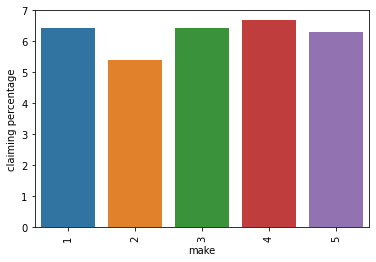

In [76]:
sns.barplot(data=d_make,x=d_make.index,y=d_make['claiming percentage'])
plt.xticks(rotation=90)
plt.show()

From above we may say that the claiming percentage for manufacturer 2 is least when compared to others. This can be due to better quality of car or maybe some other reason.


# NCAP Raiting and claim

In [77]:
df1['ncap_rating'].value_counts()

2    21402
0    19097
3    14018
4     2114
5     1961
Name: ncap_rating, dtype: int64

In [78]:
df_make1=df1[df1['make']==1]
df_make2=df1[df1['make']==2]
df_make3=df1[df1['make']==3]
df_make4=df1[df1['make']==4]
df_make5=df1[df1['make']==5]

In [79]:
df_make1

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,Yes,No,No,No,Yes,0,0,Not Claimed
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,Yes,No,No,No,Yes,0,0,Not Claimed
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,Yes,No,No,No,Yes,0,0,Not Claimed
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,Not Claimed
7,ID00008,0.509085,0.14,0.423077,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,Not Claimed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58580,ID58581,1.049947,0.19,0.692308,C8,8794,1,B2,M6,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0,Not Claimed
58582,ID58583,0.330476,0.11,0.432692,C2,27003,1,B2,M7,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0,0,Not Claimed
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,No,No,Yes,No,No,No,Yes,0,0,Not Claimed
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,No,No,Yes,No,No,No,Yes,0,0,Not Claimed


<AxesSubplot:xlabel='ncap_rating', ylabel='count'>

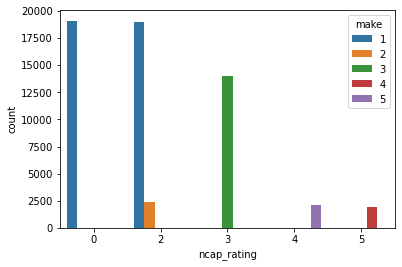

In [80]:
sns.countplot(data=df,x='ncap_rating',hue='make')

From here we can say that the raiting is very much dependent on the manufacturer. The manufacturer 1 has lowest ratings, followed by 2, then 3,5, and 4 respectively.

Hence the cars from manufacturer 4 has higest ncap rating.


In [81]:
d_m1ncap=pd.crosstab(columns=df_make1['claim'],index=df_make1['ncap_rating'],values=df_make1['is_claim'],aggfunc='count')
d_m1ncap['claiming_percentage']=d_m1ncap['Claimed']*100/(d_m1ncap['Claimed']+d_m1ncap['Not Claimed'])
d_m1ncap

claim,Claimed,Not Claimed,claiming_percentage
ncap_rating,,,
0,1192,17905,6.241818
2,1263,17766,6.637238


In [82]:
d_m2ncap=pd.crosstab(columns=df_make2['claim'],index=df_make2['ncap_rating'],values=df_make2['is_claim'],aggfunc='count')
d_m2ncap['claiming_percentage']=d_m2ncap['Claimed']*100/(d_m2ncap['Claimed']+d_m2ncap['Not Claimed'])
d_m2ncap

claim,Claimed,Not Claimed,claiming_percentage
ncap_rating,,,
2,128,2245,5.394016


In [83]:
d_m3ncap=pd.crosstab(columns=df_make3['claim'],index=df_make3['ncap_rating'],values=df_make3['is_claim'],aggfunc='count')
d_m3ncap['claiming_percentage']=d_m3ncap['Claimed']*100/(d_m3ncap['Claimed']+d_m3ncap['Not Claimed'])
d_m3ncap

claim,Claimed,Not Claimed,claiming_percentage
ncap_rating,,,
3,901,13117,6.42745


In [52]:
d_m4ncap=pd.crosstab(columns=df_make4['claim'],index=df_make4['ncap_rating'],values=df_make4['is_claim'],aggfunc='count')
d_m4ncap['claiming_percentage']=d_m4ncap['Claimed']*100/(d_m4ncap['Claimed']+d_m4ncap['Not Claimed'])
d_m4ncap

claim,Claimed,Not Claimed,claiming_percentage
ncap_rating,,,
5,131,1830,6.680265


In [84]:
d_m5ncap=pd.crosstab(columns=df_make5['claim'],index=df_make5['ncap_rating'],values=df_make5['is_claim'],aggfunc='count')
d_m5ncap['claiming_percentage']=d_m5ncap['Claimed']*100/(d_m5ncap['Claimed']+d_m5ncap['Not Claimed'])
d_m5ncap

claim,Claimed,Not Claimed,claiming_percentage
ncap_rating,,,
4,133,1981,6.291391


Now here we see that even for increasing ncap rating the claiming percentage is around 6% uniform. Hence claiming is not dependent on the ncap rating and the other factors related to ncap rating.

Personal Note==> Now this is a little unusual as having better safety should reduce claim but there must be some reason behind this, maybe as the safety of cars increase some other compromises are done. In this way even with better safety there are other componets which can cause the claim. Moreover, one other reason may be that the claim is not dependent to accidents it must be because of the damage of components with time

For now==> ncap rating and claiming are not related


<h2>Multi Variate Analysis</h2>

<AxesSubplot:xlabel='age_of_car', ylabel='age_of_policyholder'>

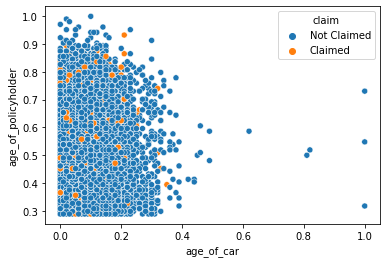

In [85]:
sns.scatterplot(df1.age_of_car,df1.age_of_policyholder,hue=df1.claim)

No inference.

<AxesSubplot:xlabel='make,model,ncap_rating,claim'>

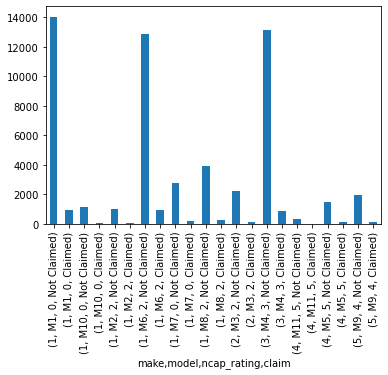

In [55]:
df1.groupby(['make','model','ncap_rating'])['claim'].value_counts().plot(kind='bar')

<h2>Feature Engineering</h2>

In [86]:
df_featured=df.copy()
df_featured['feature_score']=df[['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera','is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert']].replace(['Yes','No'],[1,0]).astype('int64').sum(axis=1)
df_featured.drop(['is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera','is_front_fog_lights',
       'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],axis=1,inplace=True)
df_featured

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,gear_box,steering_type,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim,feature_score
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,5,Power,4.6,3445,1515,1475,1185,0,0,3
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,5,Power,4.6,3445,1515,1475,1185,0,0,3
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,5,Power,4.6,3445,1515,1475,1185,0,0,3
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,5,Electric,4.8,3995,1735,1515,1335,2,0,14
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,5,Electric,5.0,3731,1579,1490,1155,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,ID58588,0.355089,0.13,0.644231,C8,8794,2,A,M3,Petrol,...,5,Electric,5.0,3731,1579,1490,1155,2,0,7
58588,ID58589,1.199642,0.02,0.519231,C14,7788,1,A,M1,CNG,...,5,Power,4.6,3445,1515,1475,1185,0,0,3
58589,ID58590,1.162273,0.05,0.451923,C5,34738,1,A,M1,CNG,...,5,Power,4.6,3445,1515,1475,1185,0,0,3
58590,ID58591,1.236307,0.14,0.557692,C8,8794,1,B2,M6,Petrol,...,5,Electric,4.8,3845,1735,1530,1335,2,0,11


In [87]:
df_featured['volume']=df_featured['length'] * df_featured['width'] * df_featured['height']
df_featured.drop(['length','width','height'],axis=1,inplace=True)


In [88]:
# featue engg calculation of max power to max torques
#MT = [(40.36bhp * 5252) / 6000rpm] * 1.3558179483 NM
def final_max_torque(x):
    p=x.split('bhp@')[0]
    r = x.split('bhp@')[1].strip('rpm')
    p_float = float(p)
    r_float = float(r)
    return (p_float*5252*1.3558179483/6000)


In [89]:
# featue engg calculation of max torque to max power
#BHP = (60 * 3500)/(5252 * 1.3558179483) bhp = 29.49 bhp
def final_max_power(x):
    t=x.split('Nm@')[0]
    r = x.split('Nm@')[1].strip('rpm')
    t_float = float(t)
    r_float = float(r)
    return ((t_float*r_float)/(1.3558179483*5252))


In [90]:
df_featured['final_max_power']=df_featured.max_torque.apply(final_max_power)
df_featured['final_max_torque']=df_featured.max_power.apply(final_max_torque)

In [91]:
df_featured.drop(['max_torque','max_power'],axis=1,inplace=True)

In [92]:
df_featured.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,gear_box,steering_type,turning_radius,gross_weight,ncap_rating,is_claim,feature_score,volume,final_max_power,final_max_torque
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,5,Power,4.6,1185,0,0,3,7698283125,29.491251,47.898951
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,5,Power,4.6,1185,0,0,3,7698283125,29.491251,47.898951
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,5,Power,4.6,1185,0,0,3,7698283125,29.491251,47.898951
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,5,Electric,4.8,1335,2,0,14,10500957375,69.824048,105.031149
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,5,Electric,5.0,1155,2,0,7,8777961010,54.313054,79.586315


In [93]:
df_featured.T

,0,1,2,3,4,5,6,7,8,9,...,58582,58583,58584,58585,58586,58587,58588,58589,58590,58591
policy_id,ID00001,ID00002,ID00003,ID00004,ID00005,ID00006,ID00007,ID00008,ID00009,ID00010,...,ID58583,ID58584,ID58585,ID58586,ID58587,ID58588,ID58589,ID58590,ID58591,ID58592
policy_tenure,0.515874,0.672619,0.84111,0.900277,0.596403,1.018709,0.097992,0.509085,0.282394,0.566255,...,0.330476,0.00287,0.009512,0.366244,1.240162,0.355089,1.199642,1.162273,1.236307,0.124429
age_of_car,0.05,0.02,0.02,0.11,0.11,0.07,0.16,0.14,0.07,0.04,...,0.11,0.03,0.0,0.09,0.07,0.13,0.02,0.05,0.14,0.02
age_of_policyholder,0.644231,0.375,0.384615,0.432692,0.634615,0.519231,0.403846,0.423077,0.298077,0.442308,...,0.432692,0.288462,0.307692,0.557692,0.461538,0.644231,0.519231,0.451923,0.557692,0.442308
area_cluster,C1,C2,C3,C4,C5,C6,C7,C8,C7,C9,...,C2,C14,C13,C8,C3,C8,C14,C5,C8,C8
population_density,4990,27003,4076,21622,34738,13051,6112,8794,6112,17804,...,27003,7788,5410,8794,4076,8794,7788,34738,8794,8794
make,1,1,1,1,2,3,4,1,3,1,...,1,3,3,3,3,2,1,1,1,3
segment,A,A,A,C1,A,C2,B2,B2,C2,B2,...,B2,C2,C2,C2,C2,A,A,A,B2,C2
model,M1,M1,M1,M2,M3,M4,M5,M6,M4,M7,...,M7,M4,M4,M4,M4,M3,M1,M1,M6,M4
fuel_type,CNG,CNG,CNG,Petrol,Petrol,Diesel,Diesel,Petrol,Diesel,Petrol,...,Petrol,Diesel,Diesel,Diesel,Diesel,Petrol,CNG,CNG,Petrol,Diesel


In [95]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   policy_id            58592 non-null  object 
 1   policy_tenure        58592 non-null  float64
 2   age_of_car           58592 non-null  float64
 3   age_of_policyholder  58592 non-null  float64
 4   area_cluster         58592 non-null  object 
 5   population_density   58592 non-null  int64  
 6   make                 58592 non-null  int64  
 7   segment              58592 non-null  object 
 8   model                58592 non-null  object 
 9   fuel_type            58592 non-null  object 
 10  engine_type          58592 non-null  object 
 11  airbags              58592 non-null  int64  
 12  rear_brakes_type     58592 non-null  object 
 13  displacement         58592 non-null  int64  
 14  cylinder             58592 non-null  int64  
 15  transmission_type    58592 non-null 

In [96]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   policy_id            58592 non-null  object 
 1   policy_tenure        58592 non-null  float64
 2   age_of_car           58592 non-null  float64
 3   age_of_policyholder  58592 non-null  float64
 4   area_cluster         58592 non-null  object 
 5   population_density   58592 non-null  int64  
 6   make                 58592 non-null  int64  
 7   segment              58592 non-null  object 
 8   model                58592 non-null  object 
 9   fuel_type            58592 non-null  object 
 10  engine_type          58592 non-null  object 
 11  airbags              58592 non-null  int64  
 12  rear_brakes_type     58592 non-null  object 
 13  displacement         58592 non-null  int64  
 14  cylinder             58592 non-null  int64  
 15  transmission_type    58592 non-null 

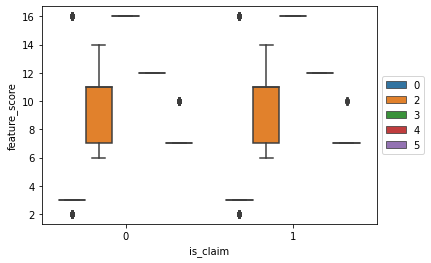

In [97]:
sns.boxplot(df_featured.is_claim,df_featured.feature_score,hue=df_featured.ncap_rating)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

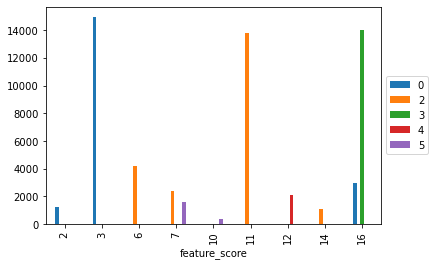

In [98]:
pd.crosstab(df_featured.feature_score,df_featured.ncap_rating).plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [66]:
#df_featured[['feature_score','is_claim']].plot(kind='bar')

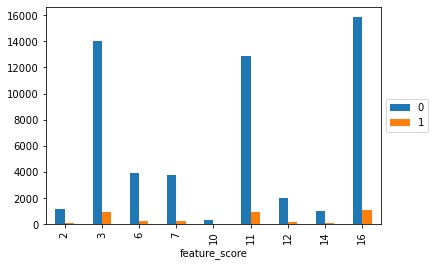

In [99]:
pd.crosstab(df_featured.feature_score,df_featured.is_claim).plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

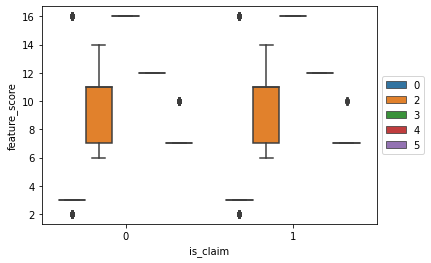

In [100]:
sns.boxplot(df_featured.is_claim,df_featured.feature_score,hue=df_featured.ncap_rating)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

<AxesSubplot:xlabel='ncap_rating', ylabel='feature_score'>

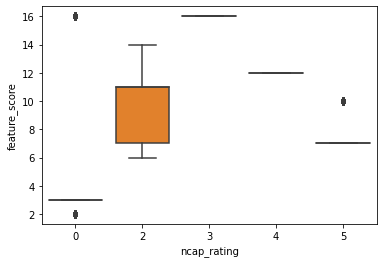

In [101]:
sns.boxplot(df_featured.ncap_rating,df_featured.feature_score)

<AxesSubplot:xlabel='feature_score', ylabel='Density'>

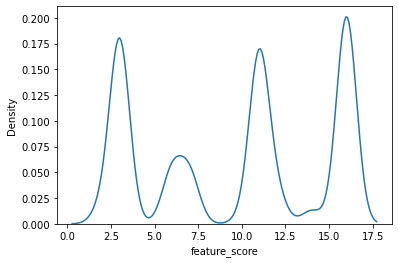

In [102]:
sns.kdeplot(df_featured.feature_score)

In [103]:
df_featured.groupby(['make','model','segment'])['feature_score'].mean()

make  model  segment
1     M1     A           3.0
      M10    Utility     2.0
      M2     C1         14.0
      M6     B2         11.0
      M7     B2         16.0
      M8     B1          6.0
2     M3     A           7.0
3     M4     C2         16.0
4     M11    C1         10.0
      M5     B2          7.0
5     M9     C1         12.0
Name: feature_score, dtype: float64

<h2>Statistical Significance Of Variables-</h2>

We will do the testing at 95% significance level and so aplha=0.05

Since our dependent variable is categorical in nature we will perform anova test for numerical columns.

In [104]:
from scipy import stats

In [105]:
num=df_featured.select_dtypes(include=np.number)

In [72]:
list=[]
for i in num:
    f=stats.f_oneway(df_featured[df_featured['is_claim']==0][i],df_featured[df_featured['is_claim']==1][i])
    print(i,f)
    if f[1]>0.05:
        print('Features are statically different for cars that have insurance claimed \n')
        list.append(i)
    if f[1]<0.05:
        print('Features are statically similar for cars that have insurance claimed \n')
print('\n Statically different features- \n',list)

policy_tenure F_onewayResult(statistic=365.59309569529785, pvalue=3.0181155799563413e-81)
Features are statically similar for cars that have insurance claimed 

age_of_car F_onewayResult(statistic=46.537983663773524, pvalue=9.072910994619658e-12)
Features are statically similar for cars that have insurance claimed 

age_of_policyholder F_onewayResult(statistic=29.50577395481918, pvalue=5.59716840605494e-08)
Features are statically similar for cars that have insurance claimed 

population_density F_onewayResult(statistic=18.586943721089227, pvalue=1.6259324287140565e-05)
Features are statically similar for cars that have insurance claimed 

make F_onewayResult(statistic=0.012172488464817869, pvalue=0.9121488360525999)
Features are statically different for cars that have insurance claimed 

airbags F_onewayResult(statistic=0.4556797244830175, pvalue=0.49965267555982473)
Features are statically different for cars that have insurance claimed 

displacement F_onewayResult(statistic=3.454045

We will use chisquare test for categorical columns.

In [106]:
cat1=df_featured.select_dtypes(include=object)

In [107]:
list1=[]
for i in cat1:
    f1=stats.chi2_contingency(pd.crosstab(df_featured[i],df_featured['is_claim']))
    print('\n',i,f1[0:2])
    if f1[1]>0.05:
        print(i,'has no assosciation with insurance claimed')
    if f1[1]<0.05:
        print(i,'has an assosciation with insurance claimed')
        list1.append(i)
print('\n Features having assosciation with insurance claimed \n',list1)


 policy_id (58591.999999999985, 0.49805766086832093)
policy_id has no assosciation with insurance claimed

 area_cluster (96.08264061605902, 1.412557511595789e-11)
area_cluster has an assosciation with insurance claimed

 segment (12.603887499528136, 0.02738747673628079)
segment has an assosciation with insurance claimed

 model (19.97498032832033, 0.02949022219663932)
model has an assosciation with insurance claimed

 fuel_type (5.759623054808867, 0.056145343695656484)
fuel_type has no assosciation with insurance claimed

 engine_type (19.974980328320328, 0.029490222196639326)
engine_type has an assosciation with insurance claimed

 rear_brakes_type (0.02261086252251578, 0.8804734284234931)
rear_brakes_type has no assosciation with insurance claimed

 transmission_type (0.01864792547400797, 0.8913806451098147)
transmission_type has no assosciation with insurance claimed

 steering_type (5.736127029443465, 0.05680882959490323)
steering_type has no assosciation with insurance claimed



<h2>Model Building</h2>

In [108]:
df_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   policy_id            58592 non-null  object 
 1   policy_tenure        58592 non-null  float64
 2   age_of_car           58592 non-null  float64
 3   age_of_policyholder  58592 non-null  float64
 4   area_cluster         58592 non-null  object 
 5   population_density   58592 non-null  int64  
 6   make                 58592 non-null  int64  
 7   segment              58592 non-null  object 
 8   model                58592 non-null  object 
 9   fuel_type            58592 non-null  object 
 10  engine_type          58592 non-null  object 
 11  airbags              58592 non-null  int64  
 12  rear_brakes_type     58592 non-null  object 
 13  displacement         58592 non-null  int64  
 14  cylinder             58592 non-null  int64  
 15  transmission_type    58592 non-null 

In [109]:
df_featured.drop('policy_id',axis=1,inplace=True)

In [110]:
X=df_featured.drop('is_claim',axis=1)
y=df_featured.is_claim
X=pd.get_dummies(X,drop_first=True)

In [111]:
X

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power
0,0.515874,0.05,0.644231,4990,1,2,796,3,5,4.6,...,0,1,0,0,0,0,1,1,0,1
1,0.672619,0.02,0.375000,27003,1,2,796,3,5,4.6,...,0,1,0,0,0,0,1,1,0,1
2,0.841110,0.02,0.384615,4076,1,2,796,3,5,4.6,...,0,1,0,0,0,0,1,1,0,1
3,0.900277,0.11,0.432692,21622,1,2,1197,4,5,4.8,...,0,0,0,0,0,0,1,0,0,0
4,0.596403,0.11,0.634615,34738,2,2,999,3,5,5.0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,2,2,999,3,5,5.0,...,0,0,0,0,0,0,1,0,0,0
58588,1.199642,0.02,0.519231,7788,1,2,796,3,5,4.6,...,0,1,0,0,0,0,1,1,0,1
58589,1.162273,0.05,0.451923,34738,1,2,796,3,5,4.6,...,0,1,0,0,0,0,1,1,0,1
58590,1.236307,0.14,0.557692,8794,1,2,1197,4,5,4.8,...,0,0,0,1,0,0,1,1,0,0


In [112]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)

In [113]:
model=LR.fit(xtrain,ytrain)
from sklearn.metrics import classification_report
ypred=model.predict(xtrain)
ypred1=model.predict(xtest)
print(classification_report(ytrain, ypred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     38390
           1       0.00      0.00      0.00      2624

    accuracy                           0.94     41014
   macro avg       0.47      0.50      0.48     41014
weighted avg       0.88      0.94      0.91     41014



In [114]:
model.score(xtrain, ytrain)

0.936021846198859

In [115]:
model.score(xtest,ytest)

0.9360564341790875

We can see that the recall value for our model is 0 for class 1 so our model is highly biased towards the majority class and so we will balance our data and than build  the model.

In [116]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [117]:
from imblearn.over_sampling import SMOTE

In [118]:
smn = SMOTE()
X2, y2 = smn.fit_resample(X, y)

In [119]:
X2

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,...,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power
0,0.515874,0.050000,0.644231,4990,1,2,796,3,5,4.60,...,0,1,0,0,0,0,1,1,0,1
1,0.672619,0.020000,0.375000,27003,1,2,796,3,5,4.60,...,0,1,0,0,0,0,1,1,0,1
2,0.841110,0.020000,0.384615,4076,1,2,796,3,5,4.60,...,0,1,0,0,0,0,1,1,0,1
3,0.900277,0.110000,0.432692,21622,1,2,1197,4,5,4.80,...,0,0,0,0,0,0,1,0,0,0
4,0.596403,0.110000,0.634615,34738,2,2,999,3,5,5.00,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109683,0.105658,0.001269,0.370877,73430,1,2,796,3,5,4.60,...,0,1,0,0,0,0,1,1,0,1
109684,0.257433,0.044037,0.425525,4076,1,2,796,3,5,4.60,...,0,1,0,0,0,0,1,1,0,1
109685,0.423755,0.000610,0.290807,4076,1,2,796,3,5,4.60,...,0,1,0,0,0,0,1,1,0,1
109686,0.167837,0.012294,0.609189,4990,1,2,796,3,5,4.60,...,0,1,0,0,0,0,1,1,0,1


In [120]:
X2.columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'gross_weight', 'ncap_rating',
       'feature_score', 'volume', 'final_max_power', 'final_max_torque',
       'area_cluster_C10', 'area_cluster_C11', 'area_cluster_C12',
       'area_cluster_C13', 'area_cluster_C14', 'area_cluster_C15',
       'area_cluster_C16', 'area_cluster_C17', 'area_cluster_C18',
       'area_cluster_C19', 'area_cluster_C2', 'area_cluster_C20',
       'area_cluster_C21', 'area_cluster_C22', 'area_cluster_C3',
       'area_cluster_C4', 'area_cluster_C5', 'area_cluster_C6',
       'area_cluster_C7', 'area_cluster_C8', 'area_cluster_C9', 'segment_B1',
       'segment_B2', 'segment_C1', 'segment_C2', 'segment_Utility',
       'model_M10', 'model_M11', 'model_M2', 'model_M3', 'model_M4',
       'model_M5', 'model_M6', 'model_M7', 'model_M8', 'model_M9',
       'fuel_type_Diesel', 'fuel_type_Petro

In [121]:
y2.value_counts()

0    54844
1    54844
Name: is_claim, dtype: int64

In [122]:
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X2, y2, test_size=0.3,stratify=y2, random_state=48)

In [124]:
from sklearn.metrics import classification_report
model1=LR.fit(xtrain1,ytrain1)
ypred=model1.predict(xtrain1)
print(classification_report(ytrain1,ypred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     38390
           1       0.50      1.00      0.67     38391

    accuracy                           0.50     76781
   macro avg       0.25      0.50      0.33     76781
weighted avg       0.25      0.50      0.33     76781



In [126]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [129]:
xtrain4, xtest4, ytrain4, ytest4 = train_test_split(X2, y2, test_size=0.3, random_state=48)

In [130]:
DT=DecisionTreeClassifier()
model2=DT.fit(xtrain4,ytrain4)
ypred=model2.predict(xtrain4)
ypred1=model2.predict(xtest4)

In [131]:
print(classification_report(ytrain4,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38468
           1       1.00      1.00      1.00     38313

    accuracy                           1.00     76781
   macro avg       1.00      1.00      1.00     76781
weighted avg       1.00      1.00      1.00     76781



In [134]:
print(classification_report(ytest4,ypred1))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     16376
           1       0.96      0.84      0.89     16531

    accuracy                           0.90     32907
   macro avg       0.91      0.90      0.90     32907
weighted avg       0.91      0.90      0.90     32907



In [135]:
GB=GradientBoostingClassifier()
model3=GB.fit(xtrain4,ytrain4)
ypred=model3.predict(xtrain4)
ypred1=model3.predict(xtest4)

In [136]:
print(classification_report(ytrain4,ypred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     38468
           1       0.95      0.83      0.89     38313

    accuracy                           0.90     76781
   macro avg       0.90      0.90      0.90     76781
weighted avg       0.90      0.90      0.90     76781



In [137]:
print(classification_report(ytest4,ypred1))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90     16376
           1       0.96      0.84      0.89     16531

    accuracy                           0.90     32907
   macro avg       0.91      0.90      0.90     32907
weighted avg       0.91      0.90      0.90     32907



# Final Model

In [138]:
xgb=XGBClassifier()
final_model=xgb.fit(xtrain4,ytrain4)
ypred=final_model.predict(xtrain4)
ypred1=final_model.predict(xtest4)

In [139]:
print(classification_report(ytrain4,ypred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     38468
           1       1.00      0.91      0.95     38313

    accuracy                           0.96     76781
   macro avg       0.96      0.96      0.96     76781
weighted avg       0.96      0.96      0.96     76781



In [140]:
print(classification_report(ytest4,ypred1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     16376
           1       1.00      0.91      0.95     16531

    accuracy                           0.95     32907
   macro avg       0.95      0.95      0.95     32907
weighted avg       0.95      0.95      0.95     32907



In [141]:
roc_auc_score(ytest4,ypred1)

0.9511046709418377

Text(0.02, 0.8, "('AUC Score for test model:', 0.9511)")

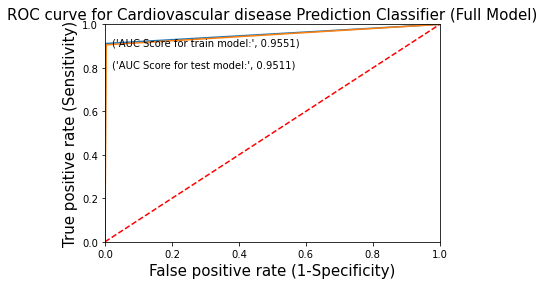

In [142]:
fpr, tpr, thresholds = roc_curve(ytrain4,ypred)


plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.plot([0, 1], [0, 1],'r--')

plt.title('ROC curve for Cardiovascular disease Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)


plt.text(x = 0.02, y = 0.9, s = ('AUC Score for train model:',round(roc_auc_score(ytrain4, ypred),4)))

fpr1, tpr1, thresholds1 = roc_curve(ytest4, ypred1)

plt.plot(fpr1, tpr1)

plt.text(x = 0.02, y = 0.8, s = ('AUC Score for test model:',round(roc_auc_score(ytest4, ypred1),4)))

We can see from the roc curve that the score for both train and test are almost same approximately 95% which means our model is a good model and also generalised as its neither underfitting or overfitting.

So our final model is the XGB model which has an accuracy of 96% in train set and 95% in test data set.
Also all the other evaluation metrics have a good score above 90% so this is a good model also values does not have a significant difference in train and test dataset so our  model can be consideres as a generalised model.

In [143]:
df.make

0        1
1        1
2        1
3        1
4        2
        ..
58587    2
58588    1
58589    1
58590    1
58591    3
Name: make, Length: 58592, dtype: int64